In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

In this Notebook we will try to prove empirically the strong law of large numbers for a renewal process.

The theorem is: 

Let $(N_t)_{t\geq0}$ be a renewal process and $\frac{1}{\lambda}:=\mathbb{E}[W_1]<\infty$
Then, $$\lim_{t\to\infty} \frac{N_t}{t}=\lambda$$

As a first step, let's try to simulate multiple versions of renewal processes. We will set an upper limit to $t$ at 50 in order to visualize the increments better.

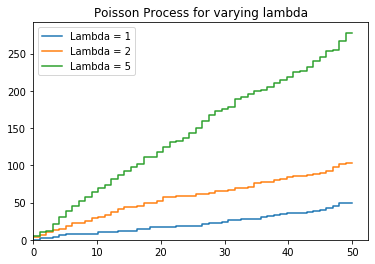

In [2]:
t = 50
# Let's try with multiple values of lambda.
lambdas = [1, 2, 5]
# These are the numpy arrays in which are stored the values of the renewel processes.
N_T = [np.random.poisson(lam, size=t) for lam in lambdas]
# cumulative sums for renewal processes for different values of lambda
S = [[np.sum(n[0:i]) for i in range(t)] for n in N_T]
# x axis
X = np.linspace(0, t, t)
graphs = [plt.step(X, S[i], label="Lambda = %d" % lambdas[i])[0]
          for i in range(len(lambdas))]
plt.legend(handles=graphs, loc=2)
plt.title("Poisson Process for varying lambda")
plt.ylim(0)
plt.xlim(0)
plt.show()

Let's take for instance $\lambda = 5$. Let's also remove the condition on the upper limit of $t$ and make it go to a much higher number, let's say 100000.

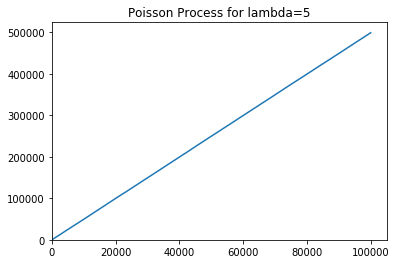

In [3]:
t = 100000
# Let's try with multiple values of lambda.
lambdas = [1, 2, 5]
# These are the numpy arrays in which are stored the values of the renewel processes.
N_T = [np.random.poisson(lam, size=t) for lam in lambdas]
# cumulative sums for renewal processes for different values of lambda
S = [[np.sum(n[0:i]) for i in range(t)] for n in N_T]
# x axis
X = np.linspace(0, t, t)
plt.step(X, S[-1])
plt.title("Poisson Process for lambda=5")
plt.ylim(0)
plt.xlim(0)
plt.show()

We can see that the curve looks like a straight line. We know that if we take a closer look, it looks more random.

In [4]:
print("The value of N_t/t equals: "+str(S[-1][-1]/t))
print("t="+str(t))

The value of N_t/t equals: 4.99052
t=100000


Second version of Poisson process generation that returns $T$ the vector of the differents claim times and $n$ the number of occurences before time limit $t$


In [5]:
def poiss (t,lamb):
    T0=0
    T=[] 
    Ti=T0
    
    while Ti < t:
        T+=[Ti]
        u=np.random.uniform()
        e=-(np.log(u)/lamb)
        Ti+=e # the interarrival times has a en exponential distribution
       
    n=len (T)
    return (T,n)


In [6]:
## Test
lam=2
t=2
T,n=poiss (t,lam)
print (T) 
print (n)

[0, 0.4136657327209446]
2


In [7]:
def conv (lamb,L):
    
    N=[]
    for t in L:
        T,n=poiss(t,lamb)
        N+= [n/t]
    plt.plot (L,N) #valeur empirique
    plt.plot(L,lamb*np.ones(len(L))) # valeur théorique
    plt.title("Convergence Nt/t-> lambda")
    plt.show()
    
    return N

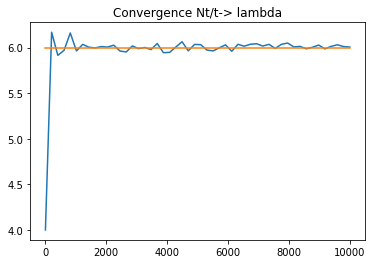

In [8]:
L=np.linspace (1,10000,50)
vect_N=conv(6,L)

We can know focus on the second point of the theorem 1.5 (relying on the central limit theorem) 
Let  $\sigma^2= Var(W_i)<\infty $.

Then $\frac{N_t-\lambda t}{\sqrt{\sigma^2 \lambda^3 t}}  \xrightarrow{\text{d}} Y$  where $Y \overset{d}{=} N(0,1)
$ 

In [9]:
def conv2 (lamb, sigm, L):
    
    X=[]
    for t in L:
        T,n=poiss(t,lamb)
        X+=[(n-lamb*t)/np.sqrt((sigm**2)*(lamb**3)*t)]
    plt.hist(X,bins=30,density=True,label='Distribution empirique') 
    tt=np.linspace(min(X),max(X))
    normal=[1/(sqrt(2*pi*1**2)) * exp(-((x)**2))/(2*1**2) for x in tt] #la loi N(0,1)
    plt.plot(tt,normal,label='Distribution théorique')
    plt.legend()

    plt.title("Convergence en loi vers N(0,1)")

    plt.show()
    return X

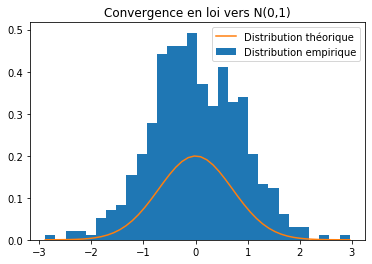

In [12]:
L=np.linspace (1,10000,500)

X=conv2(3,0.4,L)


Commentaires: L'allure change beaucoup selon les parametres (en particulier le sigma) que je donne a conv2. Je n'arrive pas à voir le souci pour l'instant.